In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv3D, MaxPool3D, Flatten, Dropout,BatchNormalization
from keras.layers import Activation
import numpy as np
# from tf.keras.utils import plot_model 

Using TensorFlow backend.


In [4]:
import sys
sys.path.append('../')
sys.path.append('.')
#from config import Config

from config import Config
from data_utils import video_to_frames
from data_utils import metadata_loader
from data_utils import dataset_builder
import os
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2
import time

In [5]:
# hyperparams
config = Config()

# Decode videos
video_to_frames.decode_videos(config)

# Get metadata
ml = metadata_loader.MetadataLoader(config)
metadata = ml.load_metadata()

db2 = dataset_builder.DatasetBuilder(config)
train_dataset2 = db2.make_video_dataset(metadata['train'])

Decoding videos to frames.
./data/20bn-something-something-v2-video
Generating training files.
Deleted folders: 0
./data/20bn-something-something-v2-label


In [6]:
start = time.time()
for x, y in train_dataset2.batch(20).take(10):
    print(x.shape[1:],np.argmax(y.numpy()))
print("\ntime required for video dataset:", time.time()-start)
x,y = None, None

(85, 200, 120, 3) 55
(85, 200, 120, 3) 143
(85, 200, 120, 3) 146
(85, 200, 120, 3) 86
(85, 200, 120, 3) 124
(85, 200, 120, 3) 164
(85, 200, 120, 3) 12
(85, 200, 120, 3) 155
(85, 200, 120, 3) 9
(85, 200, 120, 3) 106

time required for video dataset: 10.946761846542358


# Model

In [59]:
inp = Input(shape=(85,200,120,3))


x = Conv3D(64, kernel_size=(3,3,3), strides=(1, 1, 1), padding='valid')(inp)
x = MaxPool3D(pool_size=(1, 2, 2), strides=(1,2,2), padding='valid')(x)

x = Conv3D(64, kernel_size=(3,3,3), strides=(1, 1, 1), padding='valid')(x)
x = MaxPool3D(pool_size=(2, 2, 2), strides=(2,2,2), padding='valid')(x)

x = Conv3D(64, kernel_size=(3,3,3), strides=(1, 1, 1), padding='valid')(x)
x = MaxPool3D(pool_size=(2, 2, 2), strides=(2,2,2), padding='valid')(x)

x = Flatten()(x)
x = Dense(256,activation='relu')(x)
y = Dense(config.n_classes, activation='softmax')(x)

model = tf.keras.Model(inp, y)
model.summary()



model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 85, 200, 120, 3)] 0         
_________________________________________________________________
conv3d_89 (Conv3D)           (None, 83, 198, 118, 64)  5248      
_________________________________________________________________
max_pooling3d_82 (MaxPooling (None, 83, 99, 59, 64)    0         
_________________________________________________________________
conv3d_90 (Conv3D)           (None, 81, 97, 57, 64)    110656    
_________________________________________________________________
max_pooling3d_83 (MaxPooling (None, 40, 48, 28, 64)    0         
_________________________________________________________________
conv3d_91 (Conv3D)           (None, 38, 46, 26, 64)    110656    
_________________________________________________________________
max_pooling3d_84 (MaxPooling (None, 19, 23, 13, 64)    0     

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1 (Conv3D)                   (None, 85, 200, 120, 32)  2624      
_________________________________________________________________
2 (MaxPooling3D)             (None, 84, 100, 60, 32)   0         
_________________________________________________________________
3 (Dropout)                  (None, 84, 100, 60, 32)   0         
_________________________________________________________________
4 (Conv3D)                   (None, 84, 100, 60, 64)   55360     
_________________________________________________________________
5 (MaxPooling3D)             (None, 28, 34, 20, 64)    0         
_________________________________________________________________
6 (Dropout)                  (None, 28, 34, 20, 64)    0         
_________________________________________________________________
7 (Conv3D)                   (None, 28, 34, 20, 64)  

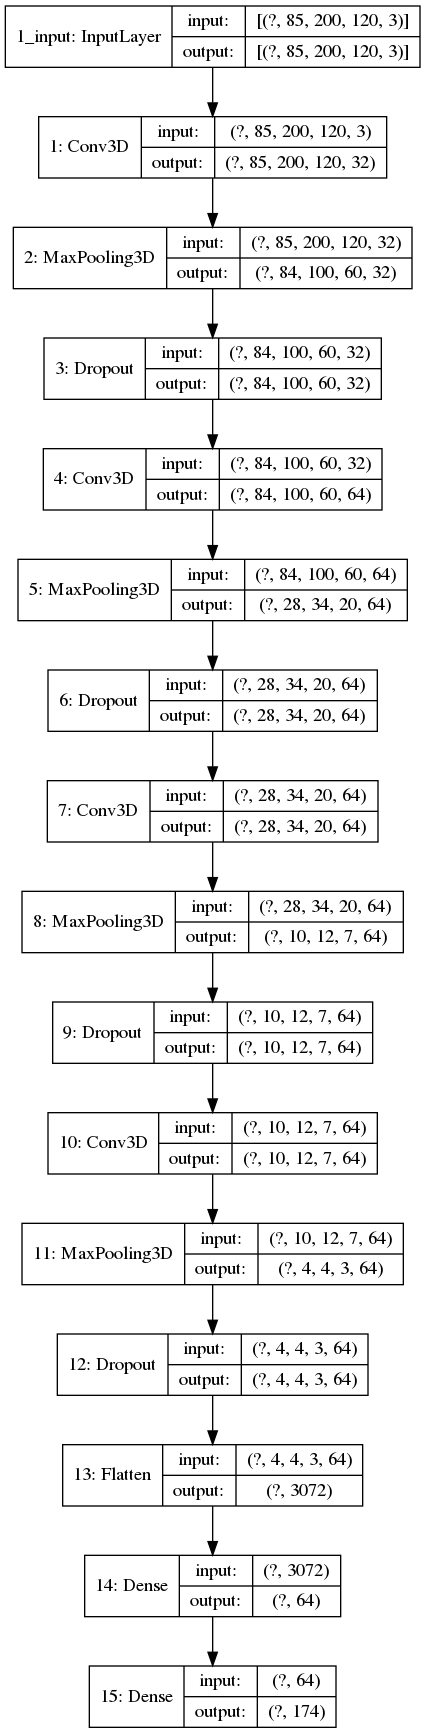

In [56]:
model = tf.keras.Sequential()

model.add(Conv3D(32, kernel_size=(3, 3, 3), input_shape=(85,200,120,3), padding="same", activation='relu', name="1"))
model.add(MaxPool3D(pool_size=(2, 2, 1), strides=(1,2,2), padding="valid", name="2"))
model.add(Dropout(0.25, name="3"))


model.add(Conv3D(64, padding="same", kernel_size=(3, 3, 3), activation='relu', name="4"))
model.add(MaxPool3D(pool_size=(3, 3, 3), padding="same", name="5"))
model.add(Dropout(0.25, name="6"))

model.add(Conv3D(64, padding="same", kernel_size=(3, 3, 3), activation='relu', name="7"))
model.add(MaxPool3D(pool_size=(3, 3, 3),padding="same", name="8"))
model.add(Dropout(0.25, name="9"))


model.add(Conv3D(64, padding="same", kernel_size=(3, 3, 3), activation='relu', name="10"))
model.add(MaxPool3D(pool_size=(3, 3, 3), padding="same", name="11"))
model.add(Dropout(0.25, name="12"))



model.add(Flatten(name="13"))
model.add(Dense(64, activation='relu', name="14"))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(config.n_classes, activation='softmax', name="15"))
model.summary()
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


tf.keras.utils.plot_model(model, show_shapes=True,
           to_file='model.png')

In [57]:
ds = train_dataset2.batch(1)

In [60]:
for x, y in train_dataset2.batch(1).take(1):
    X = x
    Y = y
X.shape

TensorShape([1, 85, 200, 120, 3])

In [ ]:
model.fit(X, Y, epochs=1)

In [55]:
config.n_classes

200